## **Exploration of Housing in Philadelphia with a focus on Logan Triangle**
#### Author: Olivia Arena

These data explore the current housing conditions in and around the Logan Triangle area of Philadelphia. Data are pulled from Census data and the Philadelphia Open Data Portal. I had previously run this code for the percentage of renter vs. owner-occupied housing units. Now, I have kept more variables from my Social Explorer housing indicator output to make multiple maps and paint a more complete picture of the housing situation in Logan compared with Philadelphia as a whole. 

### Set up

As I did in previous weeks, the initial steps in the process of importing and analyzing Census data require the importation of libraries to help spatially visualize the data downloaded from the Census Bureau. The first step in this process is to download pandas and geopandas libraries.

In [105]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

We also need to import relevant data pulled from the Census bureau, including a dataset of housing tenure, housing costs, and census block groups from the most recent ACS. For our study area, which does not fit into a pre-identified census geographic designation, I compiled a few census tracts which could make up a study area. The census tracts are 280, 281, 282, 283, 284, and 285 in Philadelphia County, PA. 

In Social Explorer, I chose to run a report pulling in 2017-2021 ACS 5-year data for Census Tracts 280, 281, 282, 283, 284, 285 in Philadelphia County, PA. I selected multiple housing variables including tenure and number of housing units. The command below reads in these data in a csv format into a new dataframe.


In [106]:
df = pd.read_csv('data/R13284958_SL140.csv')

### Data Exploration

After the initial import, several first steps include exploring these data to understand the shape and structure of the dataset.

In [107]:
df.shape

(6, 177)

In [108]:
df.head()

Geo_FILEID Geo_STUSAB  Geo_SUMLEV  Geo_GEOCOMP  Geo_LOGRECNO  Geo_US  \
0      ACSSF         pa         140            0          9077     NaN   
1      ACSSF         pa         140            0          9078     NaN   
2      ACSSF         pa         140            0          9079     NaN   
3      ACSSF         pa         140            0          9080     NaN   
4      ACSSF         pa         140            0          9081     NaN   

   Geo_REGION  Geo_DIVISION  Geo_STATECE  Geo_STATE  ...  SE_A18001_009  \
0         NaN           NaN          NaN         42  ...              0   
1         NaN           NaN          NaN         42  ...              0   
2         NaN           NaN          NaN         42  ...              0   
3         NaN           NaN          NaN         42  ...              0   
4         NaN           NaN          NaN         42  ...              0   

   PCT_SE_A18001_002  PCT_SE_A18001_003  PCT_SE_A18001_004  PCT_SE_A18001_005  \
0              19.43               6.85               6.85              21.34   
1               0.00              17.32               8.38              22.16   
2               9.52               7.34               6.53              40.16   
3               0.00               7.16              23.68              32.97   
4              12.08              23.12               4.73              11.73   

   PCT_SE_A18001_006  PCT_SE_A18001_007  PCT_SE_A18001_008  PCT_SE_A18001_009  \
0              28.50              11.94               5.10                  0   
1              17.69               6.15              28.31                  0   
2              16.32               0.00              20.13                  0   
3               9.36               8.89              17.94                  0   
4              21.19              22.07               5.08                  0   

   SE_A18009_001  
0            964  
1           1030  
2            953  
3            925  
4            886  

[5 rows x 177 columns]

Based on these initial exploratory commands, the dataset includes six rows (the six census tracts) and 218 columns, which likely includes all the specific intervals for each housing variable. For example, for the age of rental stock, the variable includes percentage of renter-occupied housing units built broken down by decade from 2019 to 1939 or earlier. So, there are nine variables that make up that specific indicator.

In [109]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 177 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    Geo_FILEID         6 non-null      object 
 1    Geo_STUSAB         6 non-null      object 
 2    Geo_SUMLEV         6 non-null      int64  
 3    Geo_GEOCOMP        6 non-null      int64  
 4    Geo_LOGRECNO       6 non-null      int64  
 5    Geo_US             0 non-null      float64
 6    Geo_REGION         0 non-null      float64
 7    Geo_DIVISION       0 non-null      float64
 8    Geo_STATECE        0 non-null      float64
 9    Geo_STATE          6 non-null      int64  
 10   Geo_COUNTY         6 non-null      int64  
 11   Geo_COUSUB         0 non-null      float64
 12   Geo_PLACE          0 non-null      float64
 13   Geo_TRACT          6 non-null      int64  
 14   Geo_BLKGRP         0 non-null      float64
 15   Geo_CONCIT         0 non-null      float64
 16   Geo_AIANHH

As expected, the number of variables is so high because of the specific increments in which the indicators are broken down. This may become an issue later on, and it might be necessary to subset the data. 

I will need to ensure that the variables for the geographies are read in as strings rather than objects, so I am going to use code to read in the two files that I will use to append to geographic data. The first file, which was initially read in, has housing data for the census tracts that make up the Logan Neighborhood. 

In [110]:
df = pd.read_csv(
    'data/R13284958_SL140.csv',
    dtype=
    {
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_TRACT':str, 
        'Geo_FIPS':str
    }
)


The second file has data for the entire Philadelphia County. By comparing the two geographies, I hope to be able to contextualize the housing patterns in the Logan Neighborhood, compared with Philadelphia as a whole. 

In [111]:
dfpa = pd.read_csv(
    'data/R13285245_SL140.csv',
    dtype=
    {
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_TRACT':str, 
        'Geo_FIPS':str
    }
)


In [112]:
df.Geo_STATE.head()

0    42
1    42
2    42
3    42
4    42
Name: Geo_STATE, dtype: object

In [113]:
df.Geo_FIPS

0    42101028000
1    42101028100
2    42101028200
3    42101028300
4    42101028400
5    42101028500
Name: Geo_FIPS, dtype: object

In [114]:
df.shape

(6, 177)

Now, I want to drop variables that have no data. 

In [115]:
df.columns[df.isna().all()].tolist()


['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE',
 'Geo_UACP',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA1']

In [116]:
df = df.dropna(axis=1,how="all")

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 134 entries, Geo_FILEID to SE_A18009_001
dtypes: float64(50), int64(75), object(9)
memory usage: 6.4+ KB


Here it looks like the values dropped from 177 variables to 134. However, I wonder if that is because these were variable categories, like % owner, that just had no data. This issue may be something to come back to. However, for now, I am going to keep all potentially relevant housing indicators including:

* Housing Units
* Households by Household Type
* White vs Non-White Homeowners (owner-occupied units) 
* Occupied housing units by year built 1939 to 2000
* Housing Units (by number and include mobile homes and boats) 
* Average Household Size (Occupied households)

In [118]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A10008_001',
                   'SE_A10008_002',
                   'SE_A10008_003',
                   'SE_A10008_004',
                   'SE_A10008_005',
                   'SE_A10008_006',
                   'SE_A10008_007',
                   'SE_A10008_008',
                   'SE_A10008_009',
                   'SE_A10003_001',
                   'SE_B10060_001',
                   'SE_B10060_002',
                   'SE_B10060_003',
                   'SE_A10036_001',
                   'SE_A18009_001',
                   'SE_A10032_001',
                   'SE_A10032_002',
                   'SE_A10032_003',
                   'SE_A10032_004',
                   'SE_A10032_005',
                   'SE_A10032_006',
                   'SE_A10032_007',
                   'SE_A10032_008',
                   'SE_A10032_009',
                   'SE_A10032_010',
                   'SE_A10032_011',
                   'SE_A10032_012',
                   'SE_A10055_001',
                   'SE_A10055_002',
                   'SE_A10055_003',
                   'SE_A10055_004',
                   'SE_A10055_005',
                   'SE_A10055_006',
                   'SE_A10055_007',
                   'SE_A10055_008',
                   'SE_A10055_009',
                   'SE_A10055_010',
                   'SE_A10055_011',]

In [119]:
df2 = df[columns_to_keep]


Because I just created a new subset of the data and added it to a new dataframe, I want to double check my work. I kept variables related to housing including the categories below: 

* Housing Units
* Households by Household Type
* White vs Non-White Homeowners (owner-occupied units) 
* Occupied housing units by year built 1939 to 2000
* Housing Units (by number and include mobile homes and boats) 
* Average Household Size (Occupied households)

In [120]:
df2.head()

Geo_FIPS  SE_A10008_001  SE_A10008_002  SE_A10008_003  SE_A10008_004  \
0  42101028000           1735           1016            585            431   
1  42101028100           1917           1062            254            808   
2  42101028200           2216           1029            486            543   
3  42101028300           2532           1248            401            847   
4  42101028400           1363            891            148            743   

   SE_A10008_005  SE_A10008_006  SE_A10008_007  SE_A10008_008  SE_A10008_009  \
0             71            360            719            466            253   
1            331            477            855            216            639   
2              0            543           1187            403            784   
3              5            842           1284            578            706   
4             89            654            472            148            324   

   ...  SE_A10055_002  SE_A10055_003  SE_A10055_004  SE_A10055_005  \
0  ...              0             57              0             15   
1  ...              0              0             87              0   
2  ...              0              0             37             14   
3  ...              0              0              0              5   
4  ...              0              0              0              0   

   SE_A10055_006  SE_A10055_007  SE_A10055_008  SE_A10055_009  SE_A10055_010  \
0             90             76             88             77            320   
1              0             81             75            178            130   
2            118            112            611            289            259   
3              0             78            204            736            331   
4             11             72             79            205            371   

   SE_A10055_011  
0           1012  
1           1366  
2            776  
3           1178  
4            625  

[5 rows x 39 columns]

In [122]:
df2.columns = ['FIPS',
                   'Households',
                   'Family Households',
                   'Married-Couple Family',
                   'Other Family',
                   'Male Householder, No Wife Present',
                   'Female Householder, No Husband Present',
                   'Nonfamily Households',
                   'Male Householder',
                   'Female Householder',
                   'Average Household Size of Occupied Housing Units',
                   'Owner Occupied Housing Units',
                   'White Alone, Not Hispanic or Latino Homeowners of Owner Occupied Housing Units',
                   'Non-White Homeowners of Owner Occupied Housing Units',
                   'Median House Value for All Owner-Occupied Housing Units',
                   'Median Gross Rent in Renter-occupied housing units paying cash rent',
                   'Housing Units',
                   '1 Unit',
                   '1 Unit, Detached',
                   '1 Unit, Attached',
                   '2 Units',
                   '3 or 4 Units',
                   '5 to 9 Units',
                   '10 to 19 Units',
                   '20 to 49 Units',
                   '50 or More Units',
                   'Mobile Home',
                   'Boat, Rv, Van, Etc.',
                   'Occupied Housing Units',
                   'Occupied Housing Units: Built 2020 or Later',
                   'Occupied Housing Units: Built 2010 to 2019',
                   'Occupied Housing Units: Built 2000 to 2009',
                   'Occupied Housing Units: Built 1990 to 1999',
                   'Occupied Housing Units: Built 1980 to 1989',
                   'Occupied Housing Units: Built 1970 to 1979',
                   'Occupied Housing Units: Built 1960 to 1969',
                   'Occupied Housing Units: Built 1950 to 1959',
                   'Occupied Housing Units: Built 1940 to 1949',
                   'Occupied Housing Units: Built 1939 or Earlier',]

In [123]:
columns = list(df2)
columns

['FIPS',
 'Households',
 'Family Households',
 'Married-Couple Family',
 'Other Family',
 'Male Householder, No Wife Present',
 'Female Householder, No Husband Present',
 'Nonfamily Households',
 'Male Householder',
 'Female Householder',
 'Average Household Size of Occupied Housing Units',
 'Owner Occupied Housing Units',
 'White Alone, Not Hispanic or Latino Homeowners of Owner Occupied Housing Units',
 'Non-White Homeowners of Owner Occupied Housing Units',
 'Median House Value for All Owner-Occupied Housing Units',
 'Median Gross Rent in Renter-occupied housing units paying cash rent',
 'Housing Units',
 '1 Unit',
 '1 Unit, Detached',
 '1 Unit, Attached',
 '2 Units',
 '3 or 4 Units',
 '5 to 9 Units',
 '10 to 19 Units',
 '20 to 49 Units',
 '50 or More Units',
 'Mobile Home',
 'Boat, Rv, Van, Etc.',
 'Occupied Housing Units',
 'Occupied Housing Units: Built 2020 or Later',
 'Occupied Housing Units: Built 2010 to 2019',
 'Occupied Housing Units: Built 2000 to 2009',
 'Occupied Housing

Now, I want to take a look to make sure these variable names were added to the columns wihtout error.

In [124]:
df2.sample(5)

FIPS  Households  Family Households  Married-Couple Family  \
1  42101028100        1917               1062                    254   
4  42101028400        1363                891                    148   
3  42101028300        2532               1248                    401   
5  42101028500        1116                416                     97   
0  42101028000        1735               1016                    585   

   Other Family  Male Householder, No Wife Present  \
1           808                                331   
4           743                                 89   
3           847                                  5   
5           319                                 85   
0           431                                 71   

   Female Householder, No Husband Present  Nonfamily Households  \
1                                     477                   855   
4                                     654                   472   
3                                     842                  1284   
5                                     234                   700   
0                                     360                   719   

   Male Householder  Female Householder  ...  \
1               216                 639  ...   
4               148                 324  ...   
3               578                 706  ...   
5               148                 552  ...   
0               466                 253  ...   

   Occupied Housing Units: Built 2020 or Later  \
1                                            0   
4                                            0   
3                                            0   
5                                            0   
0                                            0   

   Occupied Housing Units: Built 2010 to 2019  \
1                                           0   
4                                           0   
3                                           0   
5                                           0   
0                                          57   

   Occupied Housing Units: Built 2000 to 2009  \
1                                          87   
4                                           0   
3                                           0   
5                                           0   
0                                           0   

   Occupied Housing Units: Built 1990 to 1999  \
1                                           0   
4                                           0   
3                                           5   
5                                          58   
0                                          15   

   Occupied Housing Units: Built 1980 to 1989  \
1                                           0   
4                                          11   
3                                           0   
5                                          60   
0                                          90   

   Occupied Housing Units: Built 1970 to 1979  \
1                                          81   
4                                          72   
3                                          78   
5                                          19   
0                                          76   

   Occupied Housing Units: Built 1960 to 1969  \
1                                          75   
4                                          79   
3                                         204   
5                                          82   
0                                          88   

   Occupied Housing Units: Built 1950 to 1959  \
1                                         178   
4                                         205   
3                                         736   
5                                         103   
0                                          77   

   Occupied Housing Units: Built 1940 to 1949  \
1                                         130   
4                                         371   
3                                         331  

In [125]:
df2['Housing Units'].describe()


count       6.000000
mean     1982.666667
std       621.644486
min      1174.000000
25%      1599.750000
50%      1983.500000
75%      2264.500000
max      2925.000000
Name: Housing Units, dtype: float64

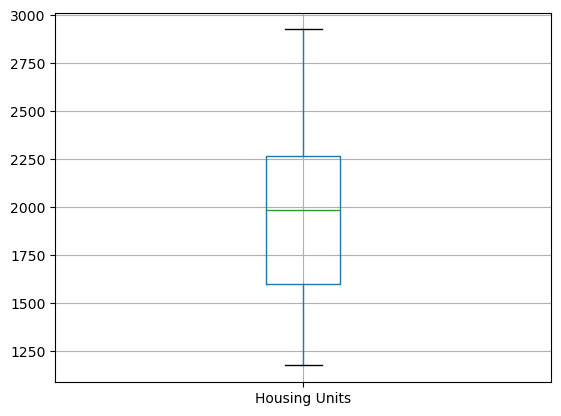

In [126]:
df2.boxplot(column=['Housing Units'])

plt.show()

Looking at the graph above, it looks like the number of housing units within the study area's census tracts ranges from around 1100 to 2900, with the majority (central 50%) falling between roughly 1600 units and 2250 units.

In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 39 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   FIPS                                                                            6 non-null      object 
 1   Households                                                                      6 non-null      int64  
 2   Family Households                                                               6 non-null      int64  
 3   Married-Couple Family                                                           6 non-null      int64  
 4   Other Family                                                                    6 non-null      int64  
 5   Male Householder, No Wife Present                                               6 non-null      int64  
 6   Female Householder, No

### Importing geographic data for mapping

Now, I will import the geographic data to be able to map the Census data on specific rtacts and visualize some of the patterns within Philadelphia. 

In [128]:
import geopandas as gpd
import matplotlib.pyplot as plt

I found a geojson file with Philadelphia Census Tracts from 2010 on the Philadelphia Open Data Portal. I am reading in the file for all of Philadelphia. Depending on the ACS dataset, I will either subset specific tracts or I will use all of the tracks in Philadelphia for comparison. 

In [129]:
tracts=gpd.read_file('data/Census_Tracts_2010.geojson')
tracts.head()

OBJECTID STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10  \
0         1        42        101    009400  42101009400     94   
1         2        42        101    009500  42101009500     95   
2         3        42        101    009600  42101009600     96   
3         4        42        101    013800  42101013800    138   
4         5        42        101    013900  42101013900    139   

         NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0   Census Tract 94   G5020          S   366717         0  +39.9632709   
1   Census Tract 95   G5020          S   319070         0  +39.9658709   
2   Census Tract 96   G5020          S   405273         0  +39.9655396   
3  Census Tract 138   G5020          S   341256         0  +39.9764504   
4  Census Tract 139   G5020          S   562934         0  +39.9750563   

     INTPTLON10 LOGRECNO                                           geometry  
0  -075.2322437    10429  POLYGON ((-75.22927 39.96054, -75.22865 39.960...  
1  -075.2379140    10430  POLYGON ((-75.23536 39.96852, -75.23545 39.969...  
2  -075.2435075    10431  POLYGON ((-75.24343 39.96230, -75.24339 39.962...  
3  -075.1771771    10468  POLYGON ((-75.17341 39.97779, -75.17386 39.977...  
4  -075.1711846    10469  POLYGON ((-75.17313 39.97776, -75.17321 39.977...

Now that the geometric data has been imported, I will run an initial plot to begin visualizing.  

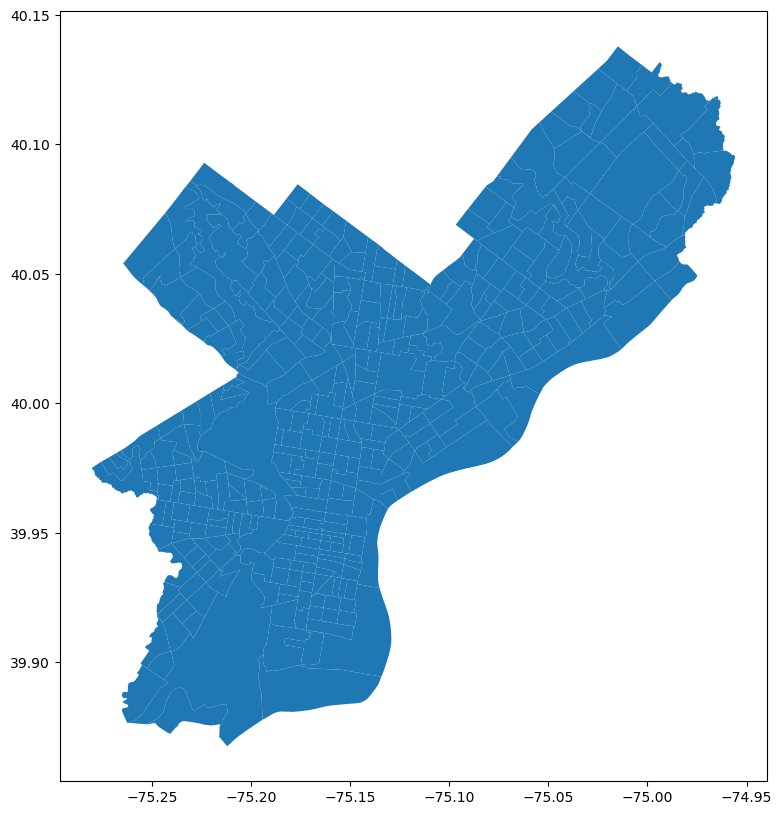

In [130]:
tracts.plot(figsize=(12,10))
plt.show()

The map above shows all of Philadelphia, PA!

In [131]:
tracts.info(verbose=True, show_counts=True)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    384 non-null    int64   
 1   STATEFP10   384 non-null    object  
 2   COUNTYFP10  384 non-null    object  
 3   TRACTCE10   384 non-null    object  
 4   GEOID10     384 non-null    object  
 5   NAME10      384 non-null    object  
 6   NAMELSAD10  384 non-null    object  
 7   MTFCC10     384 non-null    object  
 8   FUNCSTAT10  384 non-null    object  
 9   ALAND10     384 non-null    int64   
 10  AWATER10    384 non-null    int64   
 11  INTPTLAT10  384 non-null    object  
 12  INTPTLON10  384 non-null    object  
 13  LOGRECNO    384 non-null    object  
 14  geometry    384 non-null    geometry
dtypes: geometry(1), int64(3), object(11)
memory usage: 45.1+ KB


Now, I want to subset this dataset to only include the two variables that I need to use for mapping, which are the FIPS code (for joining) and the geometry (for spatial visualizing). I am dropping all variables except for the tract variable (TRACTCE10) and the geometry variable. 

In [132]:
tracts = tracts[['TRACTCE10','geometry']]
tracts.head()

TRACTCE10                                           geometry
0    009400  POLYGON ((-75.22927 39.96054, -75.22865 39.960...
1    009500  POLYGON ((-75.23536 39.96852, -75.23545 39.969...
2    009600  POLYGON ((-75.24343 39.96230, -75.24339 39.962...
3    013800  POLYGON ((-75.17341 39.97779, -75.17386 39.977...
4    013900  POLYGON ((-75.17313 39.97776, -75.17321 39.977...

As explained above, to get the full FIPS code for the tract, I will need the state and city codes for Philadelphia. Then, I will merge these codes to the specific tract codes. 

In [133]:
tracts['FIPS'] ='42' + '101' + tracts['TRACTCE10']


/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


I wanted to make sure that the new variable was created, so I printed and below I tried it the way it is written in the lab notes.

In [134]:
df2.head()

FIPS  Households  Family Households  Married-Couple Family  \
0  42101028000        1735               1016                    585   
1  42101028100        1917               1062                    254   
2  42101028200        2216               1029                    486   
3  42101028300        2532               1248                    401   
4  42101028400        1363                891                    148   

   Other Family  Male Householder, No Wife Present  \
0           431                                 71   
1           808                                331   
2           543                                  0   
3           847                                  5   
4           743                                 89   

   Female Householder, No Husband Present  Nonfamily Households  \
0                                     360                   719   
1                                     477                   855   
2                                     543                  1187   
3                                     842                  1284   
4                                     654                   472   

   Male Householder  Female Householder  ...  \
0               466                 253  ...   
1               216                 639  ...   
2               403                 784  ...   
3               578                 706  ...   
4               148                 324  ...   

   Occupied Housing Units: Built 2020 or Later  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Occupied Housing Units: Built 2010 to 2019  \
0                                          57   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Occupied Housing Units: Built 2000 to 2009  \
0                                           0   
1                                          87   
2                                          37   
3                                           0   
4                                           0   

   Occupied Housing Units: Built 1990 to 1999  \
0                                          15   
1                                           0   
2                                          14   
3                                           5   
4                                           0   

   Occupied Housing Units: Built 1980 to 1989  \
0                                          90   
1                                           0   
2                                         118   
3                                           0   
4                                          11   

   Occupied Housing Units: Built 1970 to 1979  \
0                                          76   
1                                          81   
2                                         112   
3                                          78   
4                                          72   

   Occupied Housing Units: Built 1960 to 1969  \
0                                          88   
1                                          75   
2                                         611   
3                                         204   
4                                          79   

   Occupied Housing Units: Built 1950 to 1959  \
0                                          77   
1                                         178   
2                                         289   
3                                         736   
4                                         205   

   Occupied Housing Units: Built 1940 to 1949  \
0                                         320   
1                                         130   
2                                         259  

### Housing Units

The first subset of the data that I will analyze is the number of housing units. I think this will help further contextualize the housing situation by understanding how many units are in the neighborhood, compared with the larger Philadelphia area. Having imported the geographic data and created the FIPS variable that will enable me to merge the two files, it is time to merge. I merge the file with geometry to the file of ACS with housing data into a new file "tracts_housing."

In [135]:
tracts_housing= tracts.merge(df2,on='FIPS')
#tracts_tenure = df2.merge(tracts,on='FIPS')

Now I want to see how the merge worked! 

In [136]:
tracts_housing.head()

TRACTCE10                                           geometry         FIPS  \
0    028300  POLYGON ((-75.14169 40.02076, -75.14159 40.020...  42101028300   
1    028400  POLYGON ((-75.13571 40.02392, -75.13555 40.026...  42101028400   
2    028500  POLYGON ((-75.13527 40.02919, -75.13541 40.027...  42101028500   
3    028000  POLYGON ((-75.15385 40.02217, -75.15336 40.022...  42101028000   
4    028100  POLYGON ((-75.14658 40.03065, -75.14652 40.030...  42101028100   

   Households  Family Households  Married-Couple Family  Other Family  \
0        2532               1248                    401           847   
1        1363                891                    148           743   
2        1116                416                     97           319   
3        1735               1016                    585           431   
4        1917               1062                    254           808   

   Male Householder, No Wife Present  Female Householder, No Husband Present  \
0                                  5                                     842   
1                                 89                                     654   
2                                 85                                     234   
3                                 71                                     360   
4                                331                                     477   

   Nonfamily Households  ...  Occupied Housing Units: Built 2020 or Later  \
0                  1284  ...                                            0   
1                   472  ...                                            0   
2                   700  ...                                            0   
3                   719  ...                                            0   
4                   855  ...                                            0   

   Occupied Housing Units: Built 2010 to 2019  \
0                                           0   
1                                           0   
2                                           0   
3                                          57   
4                                           0   

   Occupied Housing Units: Built 2000 to 2009  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                          87   

   Occupied Housing Units: Built 1990 to 1999  \
0                                           5   
1                                           0   
2                                          58   
3                                          15   
4                                           0   

   Occupied Housing Units: Built 1980 to 1989  \
0                                           0   
1                                          11   
2                                          60   
3                                          90   
4                                           0   

   Occupied Housing Units: Built 1970 to 1979  \
0                                          78   
1                                          72   
2                                          19   
3                                          76   
4                                          81   

   Occupied Housing Units: Built 1960 to 1969  \
0                                         204   
1                                          79   
2                                          82   
3                                          88   
4                                          75   

   Occupied Housing Units: Built 1950 to 1959  \
0                                         736   
1                                         205   
2                                         103   
3                                          77   
4                                         178   

   Occupied Housing Units: Built 1940 to 1949  \
0                             

In [137]:
tracts_housing.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 41 columns):
 #   Column                                                                          Non-Null Count  Dtype   
---  ------                                                                          --------------  -----   
 0   TRACTCE10                                                                       6 non-null      object  
 1   geometry                                                                        6 non-null      geometry
 2   FIPS                                                                            6 non-null      object  
 3   Households                                                                      6 non-null      int64   
 4   Family Households                                                               6 non-null      int64   
 5   Married-Couple Family                                                           6 non-null      int64   
 6   Other 

The benefit of including geographic data is to be able to map, so I am going to try out a quick plot of the number of housing units with equal intervals in the data to mark different colors. 

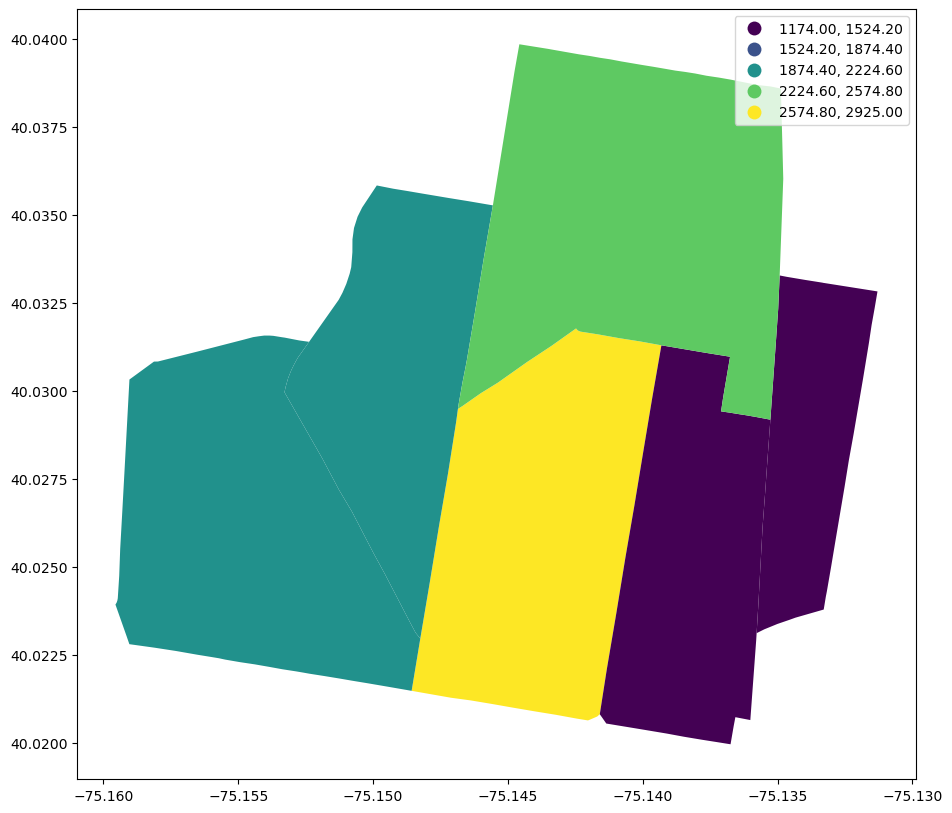

In [184]:
tracts_housing.plot(figsize=(12,10),
                 column='Housing Units',
                 legend=True, 
                 scheme='equal_interval')
plt.show()

Using equal intervals, the two census tracts (283 and 282) have the highest number of housing units.

Plotting this data doesn't make the most amount of sense (as seen above) because these are not showing a linear pattern over time or a change. These data are more of a commparison between the tracts at a given time (2021). So, instead, I am going to try to looking at these percentages like the maps above.

#### Folium Mapping 

Another opportunity to visualize some of the spatial data is in folium. I am first going to import the folium library, and then begin my viewing the specific census tracts that I selected in Philly.

In [139]:
import folium

Below, I am going to visualize both the tract level data for both the idenitifed Logan Neighborhood and the larger Philadelphia County. 

In [140]:
m = folium.Map(location=[+40.02, -75.14], 
               zoom_start = 12,
               tiles='CartoDB positron', 
               attribution='CartoDB')

m

In [141]:
# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_housing, # geo data
                  data=tracts_housing, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Housing Units'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Housing Units in Logan Neighborhood (2021)').add_to(m)    # name on the legend color bar
m

In [142]:
m.save('Logan_Triangle_Housing_Units.html')

## Comparison to Philadelphia-County

Now, I am going to try to map some of these same variables at the Philadelphia County level because Philadelphia has the same borders as Philadelphia County, and the dataset pulled from the City's database is at the County-level. I am going to run the same code that I did for the specific tracts and make comparisons.

In [143]:
dfpa.columns[dfpa.isna().all()].tolist()


['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE',
 'Geo_UACP',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA1']

In [144]:
dfpa = dfpa.dropna(axis=1,how="all")

After an initial look at the columns and a drop of the variables that are empty, I am going to just keep the FIPS and the tenure data.

In [145]:
columns_to_keep_pa = ['Geo_FIPS',
                   'SE_A10008_001',
                   'SE_A10008_002',
                   'SE_A10008_003',
                   'SE_A10008_004',
                   'SE_A10008_005',
                   'SE_A10008_006',
                   'SE_A10008_007',
                   'SE_A10008_008',
                   'SE_A10008_009',
                   'SE_A10003_001',
                   'SE_B10060_001',
                   'SE_B10060_002',
                   'SE_B10060_003',
                   'SE_A10036_001',
                   'SE_A18009_001',
                   'SE_A10032_001',
                   'SE_A10032_002',
                   'SE_A10032_003',
                   'SE_A10032_004',
                   'SE_A10032_005',
                   'SE_A10032_006',
                   'SE_A10032_007',
                   'SE_A10032_008',
                   'SE_A10032_009',
                   'SE_A10032_010',
                   'SE_A10032_011',
                   'SE_A10032_012',
                   'SE_A10055_001',
                   'SE_A10055_002',
                   'SE_A10055_003',
                   'SE_A10055_004',
                   'SE_A10055_005',
                   'SE_A10055_006',
                   'SE_A10055_007',
                   'SE_A10055_008',
                   'SE_A10055_009',
                   'SE_A10055_010',
                   'SE_A10055_011',]

In [146]:
df2pa = dfpa[columns_to_keep_pa]


In [147]:
columns = list(df2pa)
columns

['Geo_FIPS',
 'SE_A10008_001',
 'SE_A10008_002',
 'SE_A10008_003',
 'SE_A10008_004',
 'SE_A10008_005',
 'SE_A10008_006',
 'SE_A10008_007',
 'SE_A10008_008',
 'SE_A10008_009',
 'SE_A10003_001',
 'SE_B10060_001',
 'SE_B10060_002',
 'SE_B10060_003',
 'SE_A10036_001',
 'SE_A18009_001',
 'SE_A10032_001',
 'SE_A10032_002',
 'SE_A10032_003',
 'SE_A10032_004',
 'SE_A10032_005',
 'SE_A10032_006',
 'SE_A10032_007',
 'SE_A10032_008',
 'SE_A10032_009',
 'SE_A10032_010',
 'SE_A10032_011',
 'SE_A10032_012',
 'SE_A10055_001',
 'SE_A10055_002',
 'SE_A10055_003',
 'SE_A10055_004',
 'SE_A10055_005',
 'SE_A10055_006',
 'SE_A10055_007',
 'SE_A10055_008',
 'SE_A10055_009',
 'SE_A10055_010',
 'SE_A10055_011']

I will also rename the columns to more clearly show the content of the variables.

In [148]:
df2pa.columns = ['FIPS',
                   'Households',
                   'Family Households',
                   'Married-Couple Family',
                   'Other Family',
                   'Male Householder, No Wife Present',
                   'Female Householder, No Husband Present',
                   'Nonfamily Households',
                   'Male Householder',
                   'Female Householder',
                   'Average Household Size of Occupied Housing Units',
                   'Owner Occupied Housing Units',
                   'White Alone, Not Hispanic or Latino Homeowners of Owner Occupied Housing Units',
                   'Non-White Homeowners of Owner Occupied Housing Units',
                   'Median House Value for All Owner-Occupied Housing Units',
                   'Median Gross Rent in Renter-occupied housing units paying cash rent',
                   'Housing Units',
                   '1 Unit',
                   '1 Unit, Detached',
                   '1 Unit, Attached',
                   '2 Units',
                   '3 or 4 Units',
                   '5 to 9 Units',
                   '10 to 19 Units',
                   '20 to 49 Units',
                   '50 or More Units',
                   'Mobile Home',
                   'Boat, Rv, Van, Etc.',
                   'Occupied Housing Units',
                   'Occupied Housing Units: Built 2020 or Later',
                   'Occupied Housing Units: Built 2010 to 2019',
                   'Occupied Housing Units: Built 2000 to 2009',
                   'Occupied Housing Units: Built 1990 to 1999',
                   'Occupied Housing Units: Built 1980 to 1989',
                   'Occupied Housing Units: Built 1970 to 1979',
                   'Occupied Housing Units: Built 1960 to 1969',
                   'Occupied Housing Units: Built 1950 to 1959',
                   'Occupied Housing Units: Built 1940 to 1949',
                   'Occupied Housing Units: Built 1939 or Earlier',]

In [149]:
df2pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 39 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   FIPS                                                                            408 non-null    object 
 1   Households                                                                      408 non-null    int64  
 2   Family Households                                                               408 non-null    int64  
 3   Married-Couple Family                                                           408 non-null    int64  
 4   Other Family                                                                    408 non-null    int64  
 5   Male Householder, No Wife Present                                               408 non-null    int64  
 6   Female Householder

Similar to above, I am going to merge the two datasets based on the common variable -- 'FIPS'. 

In [150]:
pa_housing= tracts.merge(df2pa,on='FIPS')


I want to get an initial understanding of the range of the housing unit data across all of Philadelphia to compare with the data from the Logan Neighborhood. So, I am first going to take a look across the full dataset with the describe function. 

In [151]:
pa_housing['Housing Units'].describe()

count     363.000000
mean     1847.831956
std       689.989592
min         0.000000
25%      1370.500000
50%      1867.000000
75%      2313.000000
max      3734.000000
Name: Housing Units, dtype: float64

Based on the summary statistics produced, it looks like across Philadelphia, the number of units in a given census tract range from 0 (potentially in industrial zones, commercial zones, or public space) to 3,734 units within a tract. That's a much larger range than in the Logan Neighborhood, but further investigation could looking at a zoning map. Also in looking at the overall figures-- it seems that the tracts in Logan Neighborhood with the lower number of housing units actually fall in the lowest percentile. Alternatively, the tracts with more housing fall into the top percentile.  

Using the folium mapping functions, I am going to map out the county-level tenure data.

In [152]:
m = folium.Map(location=[+40.02, -75.14], 
               zoom_start = 10,
               tiles='CartoDB positron', 
               attribution='CartoDB')

m

In [153]:
m = folium.Map(location=[+40.02, -75.14], 
               zoom_start = 10,
               tiles='CartoDB positron', 
               attribution='CartoDB')

folium.Choropleth(
                  geo_data=pa_housing, # geo data
                  data=pa_housing, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Housing Units'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Housing Units in Philadelphia (2021)').add_to(m)    # name on the legend color bar
m

In [154]:
m.save('Philadelphia_HousingUnits.html')

In the initial look over the map, it seems like the tracts with the higher number of units are spread throughout Philadelphia. However, the tracts with the least number of housing units seem to be concentrated around downtown Philadelphia and along the rivers. This trend makes sense if these two rivers have industrial, green space, or commercial uses along them. Also, downtown is likely commercial. In looking at the tracts that make up the Logan Neighborhood, there are actually higher numbers of units than in adjacent tracts. 

### Static Maps

Now that I have had a chance to get a sense of the data both at the tract-level and at the city-level, I want to make some pretty maps!!! The dataset I will use for the neighborhood around the Logan Triangle is tracts_tenure. The dataset I will use for the entire Philadelphia area is pa_tenure.

#### Logan Neighborhood 

I am going to map the raw number of housing units in the Logan Neighborhood. I want to make it pretty, so I am going to change the color-scheme to be a more muted palette. I am also going to create a horizontal legend and remove the axes to make the map cleaner. 

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The code below will create a cleaner map with a more muted color palette. The additional (and final) line of code allows this map to be exported as PDF and edited in Adobe Illustrator. 

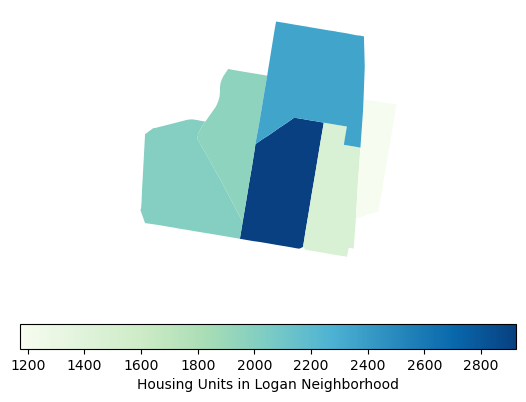

In [157]:
ax1 =tracts_housing.plot(column='Housing Units',
                   legend=True,
  legend_kwds={'label': "Housing Units in Logan Neighborhood",
                        'orientation': "horizontal"},
               cmap='GnBu');

ax1.set_axis_off()
plt.savefig("logan housing unit map.pdf", transparent=True)


I had previously run command "describe," which allowed me to see some of the summary statistics of the Logan Neighborhood housing dataset. The average number of housing units per tract within the neighborhood is 1,983, but the range is from 1,174 units to 2,925 units. As seen above, the two census tracts with the highest number of housing units are in the center of the neighborhood, which also had the highest percentage of renters. These two tracts are the densest (in terms of housing units). 

#### Philadelphia

As a comparison, I am going to map the raw numbers of housing units in Philadelphia as a whole. Similar to above, I am going to more to a more muted palette. I am also going to create a horizontal legend and remove the axes to make the map cleaner. 

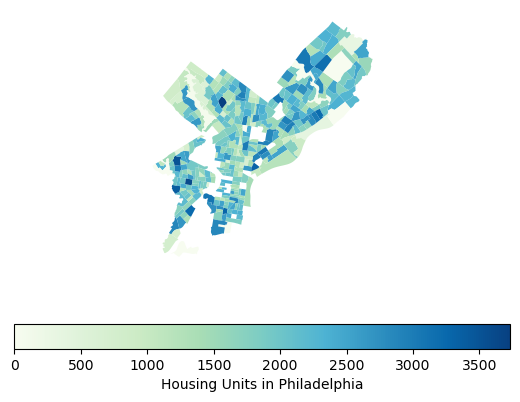

In [158]:
ax2 = pa_housing.plot(column='Housing Units',
                   legend=True,
  legend_kwds={'label': "Housing Units in Philadelphia",
                        'orientation': "horizontal"},
               cmap='GnBu');
ax2.set_axis_off()
plt.savefig("philadelphia housing unit map.pdf", transparent=True)



As a point of comparison, the map of all of Philadelphia shows that there are tracts that have a much higher amount of housing units (density). There are also many tracts that have a much lower density, specifically in the northwest.

### Economics of Housing Values and Rental Costs

Now, I hope to look at some of the housing economics of the neighborhorhood. I know that it is more owner-occupied than other parts but it also was on the higher end of housing units compared with the rest of the city. I will now look at the house value for owner-occupied housing units and gross rent for rented units. 

In [159]:
tracts_housing['Median House Value for All Owner-Occupied Housing Units'].describe()

count         6.000000
mean      96616.666667
std       15847.702252
min       76400.000000
25%       83875.000000
50%       98600.000000
75%      108450.000000
max      115400.000000
Name: Median House Value for All Owner-Occupied Housing Units, dtype: float64

In the six Logan tracts, the average home value of owner-occupied homes is $96,617 and the range is $76,400 to $115,400.

In [160]:
pa_housing['Median House Value for All Owner-Occupied Housing Units'].describe()

count       347.000000
mean     219936.887608
std      151300.112205
min       44500.000000
25%      109350.000000
50%      177000.000000
75%      273150.000000
max      984800.000000
Name: Median House Value for All Owner-Occupied Housing Units, dtype: float64

Compared with the Philadelphia figures, the home value is much lower. Across all tracts in Philadelphia, the mean value of an owner-occupied house is 219,937 over double the value of a home in the Logan neighborhood. Granted, the range in home values is much larger across Philadelphia, the tract with the lowest mean home value for an owner-occupied had a value of 44,500, while the highest average value of a tract was 984,800. 

Now, I plan to look at this spatial distribution. 

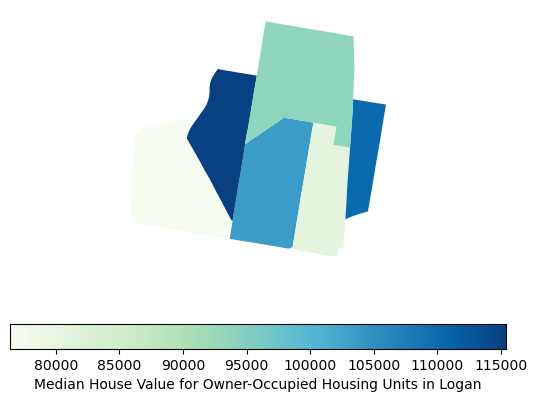

In [161]:
ax1 =tracts_housing.plot(column='Median House Value for All Owner-Occupied Housing Units',
                   legend=True,
  legend_kwds={'label': "Median House Value for Owner-Occupied Housing Units in Logan",
                        'orientation': "horizontal"},
               cmap='GnBu');

ax1.set_axis_off()
plt.savefig("logan home value map.pdf", transparent=True)


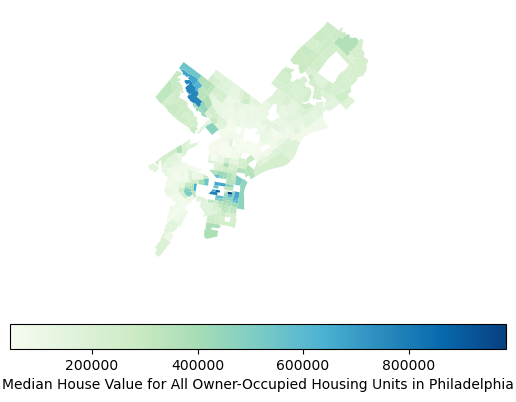

In [162]:
ax2 = pa_housing.plot(column='Median House Value for All Owner-Occupied Housing Units',
                   legend=True,
  legend_kwds={'label': "Median House Value for All Owner-Occupied Housing Units in Philadelphia",
                        'orientation': "horizontal"},
               cmap='GnBu');
ax2.set_axis_off()
plt.savefig("philadelphia home value map.pdf", transparent=True)

It looks like the tracts with the higher percentage of renters, still have (relative to the other census tracts in the neighborhood) okay home value. Across Philadelphia, the areas with the highest averages are in the northwest along the river and in the southeast part of downtown. I want to explore this theory a little more and look at the interactive folium map. 

In [163]:
m = folium.Map(location=[+40.02, -75.14], 
               zoom_start = 10,
               tiles='CartoDB positron', 
               attribution='CartoDB')

folium.Choropleth(
                  geo_data=pa_housing, # geo data
                  data=pa_housing, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Median House Value for All Owner-Occupied Housing Units'], # [key, value]
                  fill_color='GnBu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Home Values in Philadelphia (2021)').add_to(m)    # name on the legend color bar
m

Looking at the interactive map, the Logan Neighborhood is made up of census tracts among those with the lowest home values. In the southeast section -- home values are highest along Lombard Street and Locust Street. The neighborhoods are Rittenhouse Square and Society Hill. In the northwest, the neighborhoods with the highest home values are Carpenter, Gravers, and Saint Martin.

Now onto rental values for Logan Neighborhood and then Philadelphia

In [164]:
tracts_housing['Median Gross Rent in Renter-occupied housing units paying cash rent'].describe()

count       6.000000
mean      932.666667
std        66.433927
min       838.000000
25%       895.750000
50%       939.000000
75%       961.250000
max      1030.000000
Name: Median Gross Rent in Renter-occupied housing units paying cash rent, dtype: float64

In [165]:
pa_housing['Median Gross Rent in Renter-occupied housing units paying cash rent'].describe()

count     352.000000
mean     1158.272727
std       302.733378
min       310.000000
25%       960.750000
50%      1111.000000
75%      1310.250000
max      2492.000000
Name: Median Gross Rent in Renter-occupied housing units paying cash rent, dtype: float64

In looking at the median rents, within the Logan Neighborhood, the mean is 933 across the tracts. The tracts’ averages range from 838 to 1,030. Compared with the mean rent across all Philadelphia tracts (1,158), the rent in Logan is much lower. One thing to note is the max median rent in one tract is 2,492. 


Now to see the spatial distribution, I again turn to the folium to map.

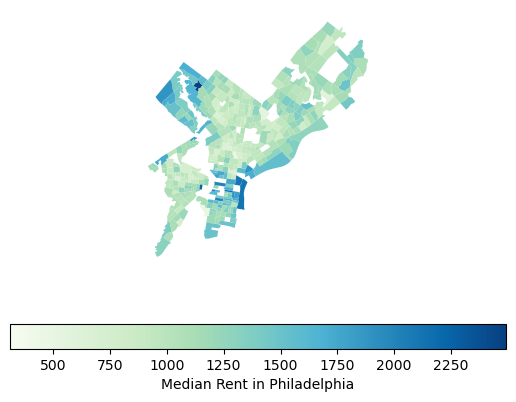

In [166]:
ax2 = pa_housing.plot(column='Median Gross Rent in Renter-occupied housing units paying cash rent',
                   legend=True,
  legend_kwds={'label': "Median Rent in Philadelphia",
                        'orientation': "horizontal"},
               cmap='GnBu');
ax2.set_axis_off()
plt.savefig("philadelphia rent value map.pdf", transparent=True)

In [167]:
m = folium.Map(location=[+40.02, -75.14], 
               zoom_start = 10,
               tiles='CartoDB positron', 
               attribution='CartoDB')

folium.Choropleth(
                  geo_data=pa_housing, # geo data
                  data=pa_housing, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Median Gross Rent in Renter-occupied housing units paying cash rent'], # [key, value]
                  fill_color='GnBu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Rents in Philadelphia (2021)').add_to(m)    # name on the legend color bar
m

In looking at the distribution, the highest rents are again in the northwest corner and along downtown. The rents along Christopher Columbus Boulevard on the Delaware River were high. Similar to the home values, rents in Center City, Rittenhouse Square, and Society Hall had the census tracts with the highest median rents. 


### Affordable Housing Units

Now I want to explore specific sites of affordable housing investment. I am going to read in a dataset of affordable housing developments that were funded by Division of Housing and Community Development (DHCD) and built between 1994 to August 2019.

In [168]:
df3 = pd.read_csv('data/ah.csv')

In [169]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              401 non-null    int64  
 1   FISCAL_YEAR_COMPLETE  397 non-null    float64
 2   PROJECT_NAME          401 non-null    object 
 3   DEVELOPER_NAME        401 non-null    object 
 4   ADDRESS               401 non-null    object 
 5   PROJECT_TYPE          401 non-null    object 
 6   TOTAL_UNITS           398 non-null    float64
 7   ACCESSIBLE_UNITS      28 non-null     float64
 8   SENSORY_UNITS         24 non-null     float64
 9   VISITABLE_UNITS       21 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 31.5+ KB


In looking at the file, there are no geographic variables. However, there are addresses that could be geocoded to be mapped. There are also no city, state, or zip code fields. At this point I am going to upload a CSV where I have added a variable for City and State and added Philadelphi and PA because these are all afforable housing units in Philadelphia. I named this file "ahedit" and I will reupload here. 

In [170]:
df4 = pd.read_csv('data/ahedit.csv')

In [171]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              401 non-null    int64  
 1   FISCAL_YEAR_COMPLETE  397 non-null    float64
 2   PROJECT_NAME          401 non-null    object 
 3   DEVELOPER_NAME        401 non-null    object 
 4   ADDRESS               401 non-null    object 
 5   CITY                  401 non-null    object 
 6   STATE                 401 non-null    object 
 7   PROJECT_TYPE          401 non-null    object 
 8   TOTAL_UNITS           398 non-null    float64
 9   ACCESSIBLE_UNITS      28 non-null     float64
 10  SENSORY_UNITS         24 non-null     float64
 11  VISITABLE_UNITS       21 non-null     float64
dtypes: float64(5), int64(1), object(6)
memory usage: 37.7+ KB


Now that it looks like these addresses are a little more complete, I will likely need to concatenate these variables together to make on address variable for the lat and long geocode. I am going to import several libraries that can help me convert address data into lats and longs to map (thanks for the code @chris!)

In [172]:
import geopy
dir(geopy)
from geopy.geocoders import Photon
dir(Photon)
from geopy.geocoders import Nominatim
import time
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy import distance
import osmnx as ox
import contextily as ctx

I also found code that will allow me to identify my specific (non-geocoded) column and run a geocode function to produce a lat, long to then map.

However, I need to make a new more complete address variable. When I initially tried this, I got a map of projects all over the world because of multiple places with the same street address. So, I am going to concatenate this different fields together to get a new variable.

In [173]:
df4['ADDRESS2'] = df4['ADDRESS'] + ' ' + df4['CITY'] + ' ' + df4['STATE']

In [174]:
df4['ADDRESS2'].sample()

144    332-34 E WALNUT LN PHILADELPHIA PA
Name: ADDRESS2, dtype: object

IT LOOKS LIKE IT WORKED!!!!

Now time to geocode these more complete addresses using ['ADDRESS2']

In [175]:
for index, row in df4.iterrows():

    # identify the address column
    address = row['ADDRESS2']
    
    try:
        
        # geocode it
        geocoded_address = ox.geocoder.geocode(address)

        # add it to the dataframe
        df4.at[index,'lat']=geocoded_address[0]
        df4.at[index,'lon']=geocoded_address[1]

        # print the output
        print(address + ' geocoded to ' + str(geocoded_address[0])+' '+str(geocoded_address[1]))        

    except:
        print('Could not geocode '+ address)
        pass

1315 N 8TH ST PHILADELPHIA PA geocoded to 39.972245 -75.14947471428572
3921-61 N 5TH ST PHILADELPHIA PA geocoded to 39.9614883 -75.1465345
3232 HENRY AVE PHILADELPHIA PA geocoded to 40.01024132653061 -75.1810400612245
161-71 W ALLEGHENY AVE PHILADELPHIA PA geocoded to 40.0028681 -75.1627782
447 CANTRELL ST PHILADELPHIA PA geocoded to 39.92200279591837 -75.15428936734693
2000 S 58TH ST PHILADELPHIA PA geocoded to 39.934514 -75.227223
2011-25 N MARSHALL ST PHILADELPHIA PA geocoded to 40.01853 -75.137593
2601 N BROAD ST PHILADELPHIA PA geocoded to 39.99246 -75.154817
1701 S 28TH ST PHILADELPHIA PA geocoded to 39.9316908 -75.19026365765035
1702 N 52nd St PHILADELPHIA PA geocoded to 39.98063232653061 -75.2247380612245
2413-29 N BROAD ST PHILADELPHIA PA geocoded to 40.0336697 -75.1458664
1822-26 W TIOGA ST PHILADELPHIA PA geocoded to 40.006389 -75.153547
3202 MANTUA AVE PHILADELPHIA PA geocoded to 39.96590999853028 -75.18920518697685
1900 W ALLEGHENY AVE PHILADELPHIA PA geocoded to 40.002532

To check my geocoding, I look at the new dataframe. I see that lat and lon are new variables for latitute and longitude. It looks like there were 359 addresses that mapped, so this will be another point to look into, how to clean up address data! 

In [176]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              401 non-null    int64  
 1   FISCAL_YEAR_COMPLETE  397 non-null    float64
 2   PROJECT_NAME          401 non-null    object 
 3   DEVELOPER_NAME        401 non-null    object 
 4   ADDRESS               401 non-null    object 
 5   PROJECT_TYPE          401 non-null    object 
 6   TOTAL_UNITS           398 non-null    float64
 7   ACCESSIBLE_UNITS      28 non-null     float64
 8   SENSORY_UNITS         24 non-null     float64
 9   VISITABLE_UNITS       21 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 31.5+ KB


Now that 359 projects from the Philadelphia database have geographic coordinates, I am going to try to generate a map showing the projects' distributions across Philadelphia. It is nice that the variable type is already float, so I won't need to convert that. 

However, the next step will be to convert the dataframe to a geodataframe to map! 

In [177]:
gdf4 = gpd.GeoDataFrame(df4, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df4.lon, df4.lat))

In [178]:
gdf4.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   OBJECTID              401 non-null    int64   
 1   FISCAL_YEAR_COMPLETE  397 non-null    float64 
 2   PROJECT_NAME          401 non-null    object  
 3   DEVELOPER_NAME        401 non-null    object  
 4   ADDRESS               401 non-null    object  
 5   CITY                  401 non-null    object  
 6   STATE                 401 non-null    object  
 7   PROJECT_TYPE          401 non-null    object  
 8   TOTAL_UNITS           398 non-null    float64 
 9   ACCESSIBLE_UNITS      28 non-null     float64 
 10  SENSORY_UNITS         24 non-null     float64 
 11  VISITABLE_UNITS       21 non-null     float64 
 12  ADDRESS2              401 non-null    object  
 13  lat                   325 non-null    float64 
 14  lon                   325 non-null    float64 
 15

Now that these points are mapped, I am going to use code to place the points on an initial map. 

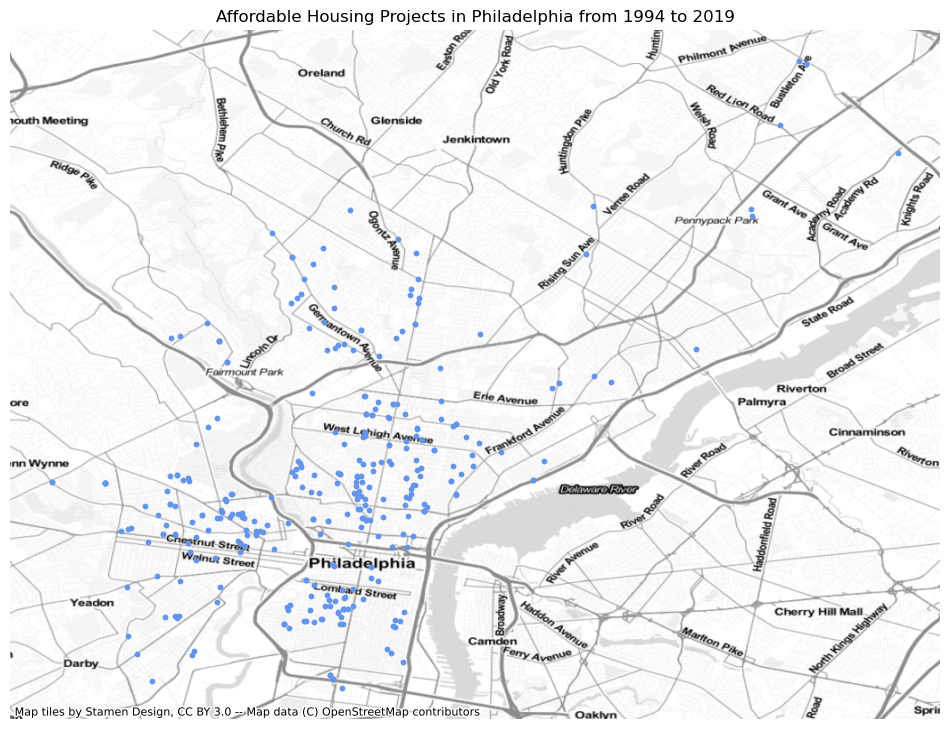

In [179]:
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
gdf4.plot(ax=ax, 
        marker='o',
        markersize=10,
        color='cornflowerblue')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Affordable Housing Projects in Philadelphia from 1994 to 2019')

# add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=4326)
plt.savefig("affordablehousingprojects.pdf", transparent=True)

I also want to explore the projects to find additional details on them, so I am going to map these places on a folium map. I am going back to week 2 to look over the code I had through running! I am going to set up a loop to start mapping my markers for each housing project.

In [180]:
for index, row in gdf4.iterrows():
    print(row.PROJECT_NAME, row.lat, row.lon)

Gloria Casarez Residence (1315 N 8th) 39.972245 -75.14947471428572
Roberto Clemente Homes 39.9614883 -75.1465345
Henry Avenue Senior Campus I 40.01024132653061 -75.1810400612245
Villas Del Caribe 40.0028681 -75.1627782
Cantrell Place 39.92200279591837 -75.15428936734693
Ann Thomas Presbyterian 39.934514 -75.227223
APM Preservation 40.01853 -75.137593
The Lofts at 2601 39.99246 -75.154817
Anthony Wayne III 39.9316908 -75.19026365765035
Centennial Village 39.98063232653061 -75.2247380612245
Ruth Williams House 40.0336697 -75.1458664
Tioga Family 40.006389 -75.153547
Mt. Vernon Manor II 39.96590999853028 -75.18920518697685
NewCourtland at Allegheny II 40.002532 -75.160703
Wynn Senior Residences 39.972644 -75.229026
Orinoka Mills nan nan
Lindley Court 40.03115 -75.150579
Blumberg Apartments I 39.962308 -75.178236
St. Raymond's House 40.07232812244898 -75.1679818367347
Tajdeed 39.982036 -75.22896
NewCourtland at Allegheny 40.002532 -75.160703
Nativity BVM Senior 39.98719728571429 -75.102404

In my first time running these data, I observed "nan" values, so there is an empty cell. Because of the data quality, these will need to be dropped for now. However, in the future, I would want to investigate these places because they could be helpful for our project! 

Below, I drop rows that do not have values and create a new dataset.

In [181]:
gdf5=gdf4.dropna(subset=['lon'])

gdf5=gdf4.dropna(subset=['lat'])

To see the outcome, I am going to look at how many remaining observations are in the dataset. 

In [182]:
gdf5.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 325 entries, 0 to 400
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   OBJECTID              325 non-null    int64   
 1   FISCAL_YEAR_COMPLETE  321 non-null    float64 
 2   PROJECT_NAME          325 non-null    object  
 3   DEVELOPER_NAME        325 non-null    object  
 4   ADDRESS               325 non-null    object  
 5   CITY                  325 non-null    object  
 6   STATE                 325 non-null    object  
 7   PROJECT_TYPE          325 non-null    object  
 8   TOTAL_UNITS           323 non-null    float64 
 9   ACCESSIBLE_UNITS      26 non-null     float64 
 10  SENSORY_UNITS         22 non-null     float64 
 11  VISITABLE_UNITS       21 non-null     float64 
 12  ADDRESS2              325 non-null    object  
 13  lat                   325 non-null    float64 
 14  lon                   325 non-null    float64 
 15

Yep! Now only 325, down from 401. That's a really large number of projects. So, again, I will want to do some data cleaning and ask about best practices.

In [183]:
for index, row in gdf5.iterrows():
    # add folium marker code
    folium.Marker([row.lat, row.lon], popup=row.PROJECT_NAME).add_to(m)
m

In looking at the map above, it seems there are about five affordable housing projects within or in the immediate vicinity of the Logan neighborhood. They are:

* APM Preservation
* Winghocking Street
* Belfield Avenue Townhomes
* Lindley Court
* Shelton Court

I noticed that projects are concentrated near the downtown and immediate neighborhoods. There are very few if any projects in the northwest, where some of the home values were highest. In running this map a second time, I can see that the areas with the highest rents also tend to lack affordable housing projects.